In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import ( LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ( RandomForestRegressor, GradientBoostingRegressor)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
import joblib
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import requests
import pickle


In [ ]:

# shared link
shared_link = 'https://drive.google.com/file/d/1o6oV2JsdovPDS-whwK9tloeFsFHbYDry/view?usp=sharing'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('AmesHousing.csv', 'wb') as f:
    f.write(response.content)
Data=pd.read_csv('AmesHousing.csv')
Data.head(20)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [ ]:

# Find columns with null values and their counts
null_counts = Data.isnull().sum()

# Filter for columns with at least one null value
columns_with_nulls = null_counts[null_counts > 0]

print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [ ]:
# Loop through columns with nulls and print type and mode
for column in columns_with_nulls.index:
  try:
    print(f"Column: {column}")
    print(f"Type: {Data[column].dtype}")
    print(f"Mode: {Data[column].mode()[0]}")
    print("-" * 20)
  except Exception as e:
    print(f"Error processing column {column}: {e}")

Column: Lot Frontage
Type: float64
Mode: 60.0
--------------------
Column: Alley
Type: object
Mode: Grvl
--------------------
Column: Mas Vnr Type
Type: object
Mode: BrkFace
--------------------
Column: Mas Vnr Area
Type: float64
Mode: 0.0
--------------------
Column: Bsmt Qual
Type: object
Mode: TA
--------------------
Column: Bsmt Cond
Type: object
Mode: TA
--------------------
Column: Bsmt Exposure
Type: object
Mode: No
--------------------
Column: BsmtFin Type 1
Type: object
Mode: GLQ
--------------------
Column: BsmtFin SF 1
Type: float64
Mode: 0.0
--------------------
Column: BsmtFin Type 2
Type: object
Mode: Unf
--------------------
Column: BsmtFin SF 2
Type: float64
Mode: 0.0
--------------------
Column: Bsmt Unf SF
Type: float64
Mode: 0.0
--------------------
Column: Total Bsmt SF
Type: float64
Mode: 0.0
--------------------
Column: Electrical
Type: object
Mode: SBrkr
--------------------
Column: Bsmt Full Bath
Type: float64
Mode: 0.0
--------------------
Column: Bsmt Half Bat

In [ ]:
# Numeric columns
Data['Lot Frontage'] = Data['Lot Frontage'].fillna(Data['Lot Frontage'].median())
Data['Mas Vnr Area'] = Data['Mas Vnr Area'].fillna(Data['Mas Vnr Area'].mean())
Data['BsmtFin SF 1'] = Data['BsmtFin SF 1'].fillna(0)
Data['BsmtFin SF 2'] = Data['BsmtFin SF 2'].fillna(0)
Data['Bsmt Unf SF'] = Data['Bsmt Unf SF'].fillna(0)
Data['Total Bsmt SF'] = Data['Total Bsmt SF'].fillna(0)
Data['Bsmt Full Bath'] = Data['Bsmt Full Bath'].fillna(0)
Data['Bsmt Half Bath'] = Data['Bsmt Half Bath'].fillna(0)
Data['Garage Yr Blt'] = Data['Garage Yr Blt'].fillna(Data['Garage Yr Blt'].median())
Data['Garage Cars'] = Data['Garage Cars'].fillna(Data['Garage Cars'].median())
Data['Garage Area'] = Data['Garage Area'].fillna(Data['Garage Area'].median())

# Categorical columns - using mode to fill
Data['Alley'] = Data['Alley'].fillna('No Alley')
Data['Mas Vnr Type'] = Data['Mas Vnr Type'].fillna(Data['Mas Vnr Type'].mode()[0])
Data['Bsmt Qual'] = Data['Bsmt Qual'].fillna(Data['Bsmt Qual'].mode()[0])
Data['Bsmt Cond'] = Data['Bsmt Cond'].fillna(Data['Bsmt Cond'].mode()[0])
Data['Bsmt Exposure'] = Data['Bsmt Exposure'].fillna(Data['Bsmt Exposure'].mode()[0])
Data['BsmtFin Type 1'] = Data['BsmtFin Type 1'].fillna(Data['BsmtFin Type 1'].mode()[0])
Data['BsmtFin Type 2'] = Data['BsmtFin Type 2'].fillna(Data['BsmtFin Type 2'].mode()[0])
Data['Electrical'] = Data['Electrical'].fillna(Data['Electrical'].mode()[0])
Data['Fireplace Qu'] = Data['Fireplace Qu'].fillna('No Fireplace')
Data['Garage Type'] = Data['Garage Type'].fillna('No Garage')
Data['Garage Finish'] = Data['Garage Finish'].fillna(Data['Garage Finish'].mode()[0])
Data['Garage Qual'] = Data['Garage Qual'].fillna(Data['Garage Qual'].mode()[0])
Data['Garage Cond'] = Data['Garage Cond'].fillna(Data['Garage Cond'].mode()[0])
Data['Pool QC'] = Data['Pool QC'].fillna('None')
Data['Fence'] = Data['Fence'].fillna('None')
Data['Misc Feature'] = Data['Misc Feature'].fillna('None')

# Verify if all null values are filled
print(Data.isnull().sum())


Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
# Encode categorical variables using one-hot encoding
Data = pd.get_dummies(Data, drop_first=True)

# Print the updated DataFrame info
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 269 entries, Order to Sale Condition_Partial
dtypes: bool(230), float64(11), int64(28)
memory usage: 1.5 MB


In [ ]:
# Separate features and target variable
X = Data.drop('SalePrice', axis=1)
y = Data['SalePrice']


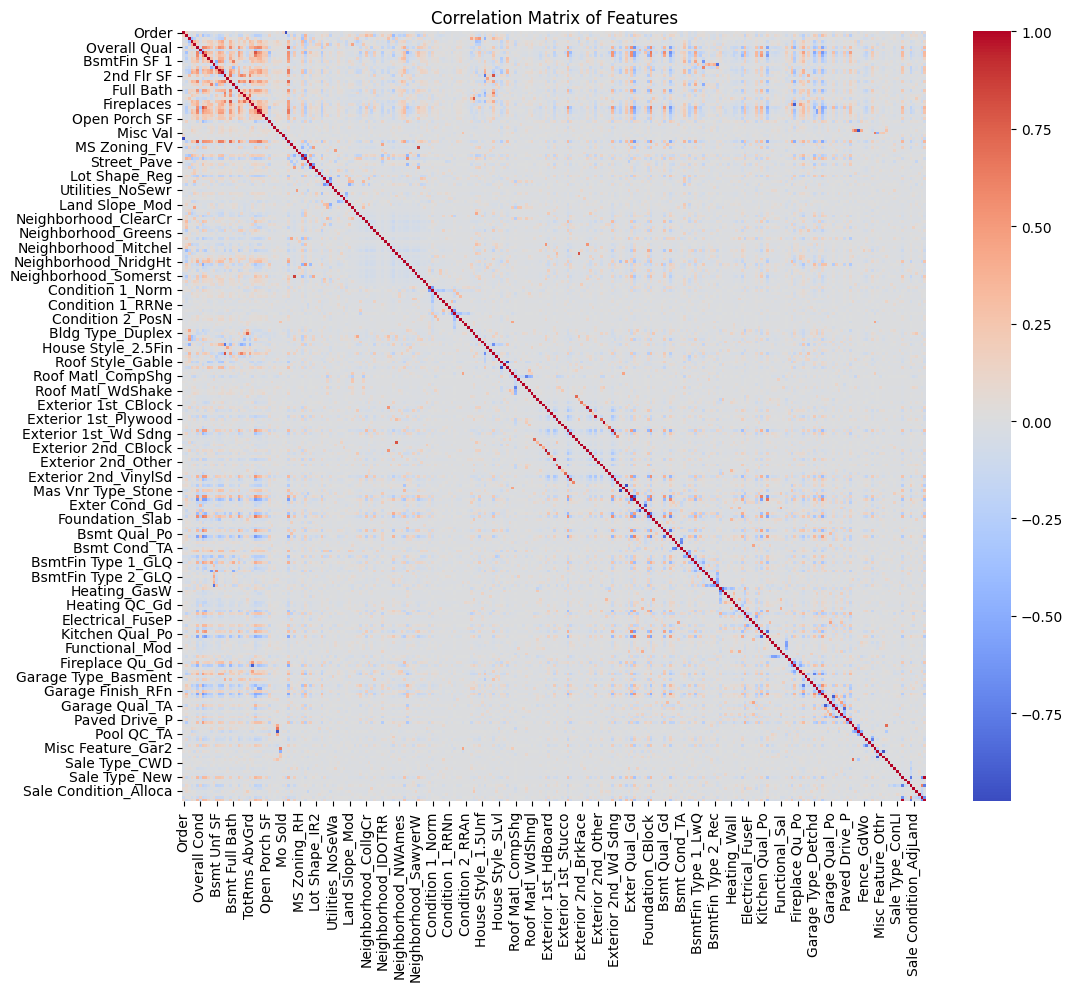

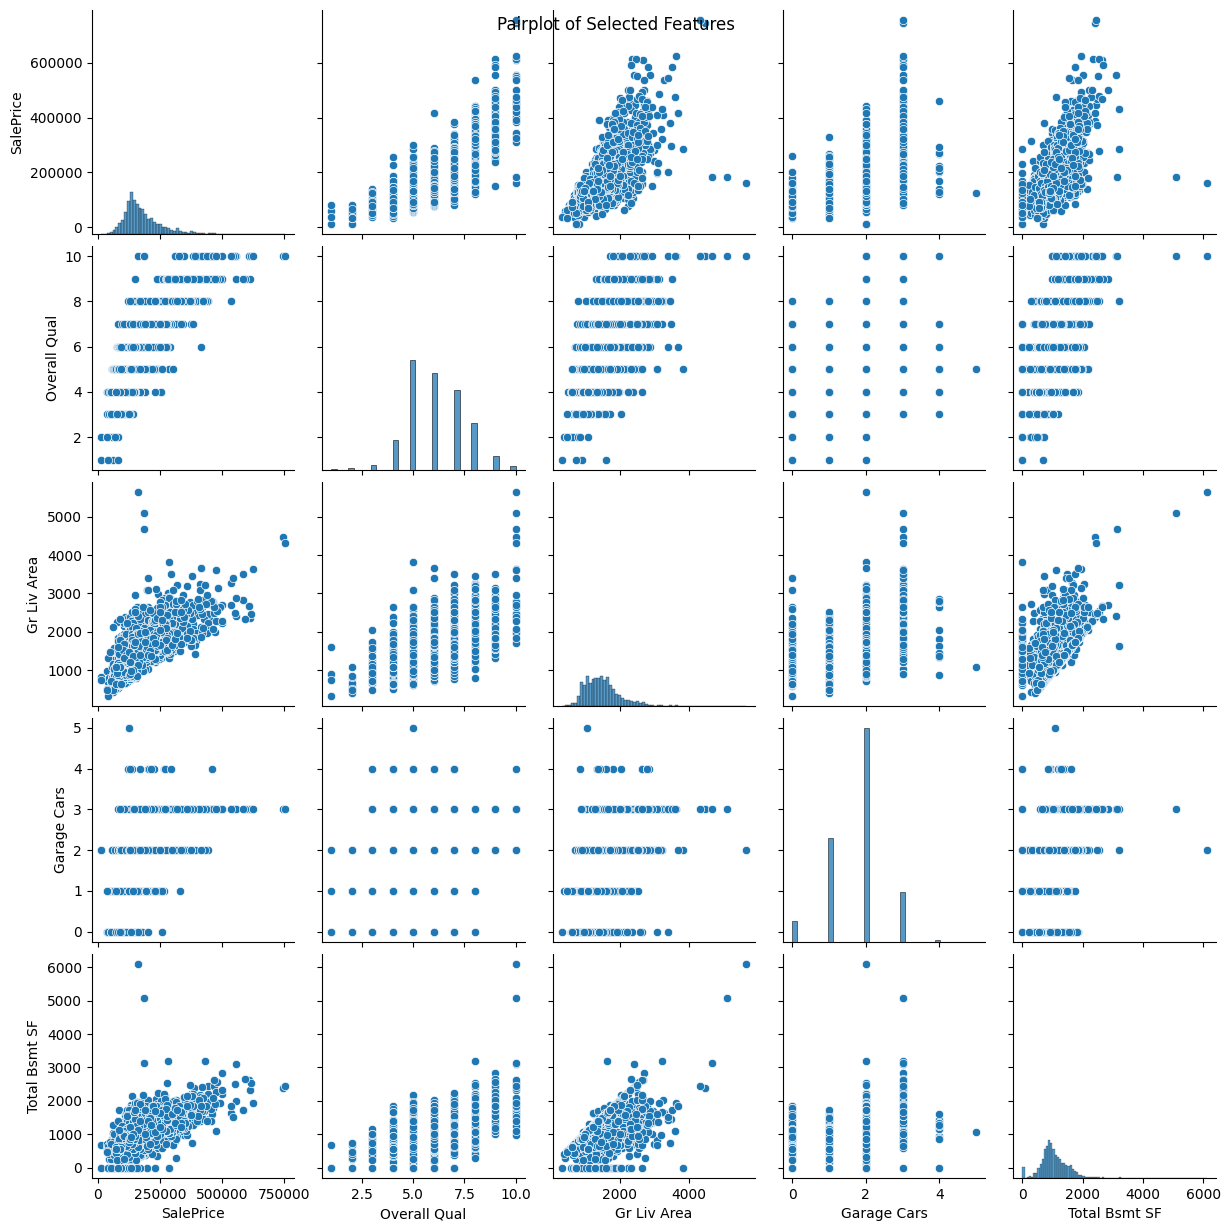

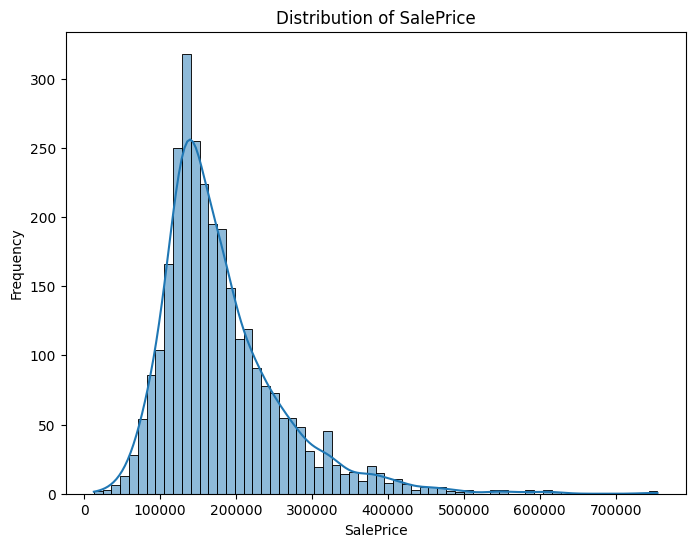

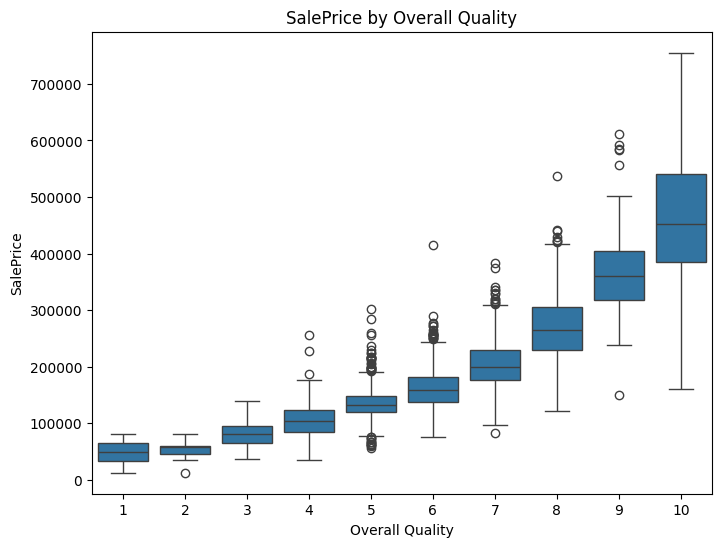

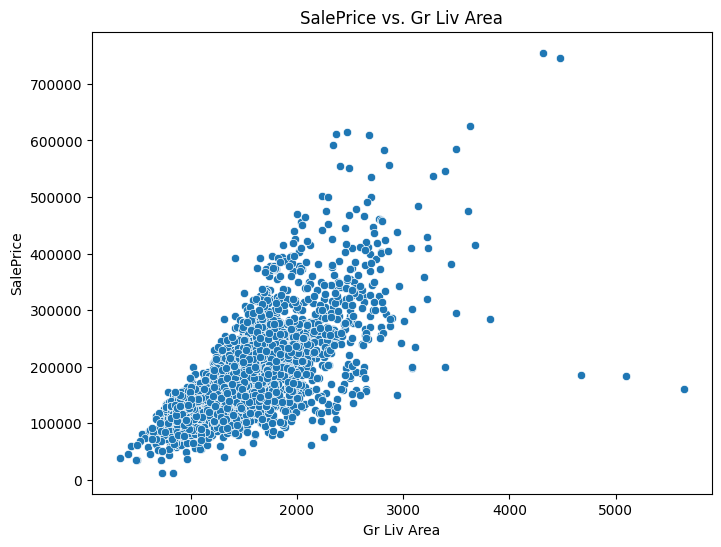

In [ ]:


# Correlation Matrix Heatmap
correlation_matrix = Data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Pairplot for selected features
selected_features = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF']
sns.pairplot(Data[selected_features])
plt.suptitle('Pairplot of Selected Features')
plt.show()

# Histogram of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(Data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Boxplot of SalePrice by Overall Quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='Overall Qual', y='SalePrice', data=Data)
plt.title('SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot of SalePrice vs. Gr Liv Area
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=Data)
plt.title('SalePrice vs. Gr Liv Area')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical features
numerical_features = X.select_dtypes(include=np.number).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

X_train_scaled = X_train
X_test_scaled = X_test


# Create directories for saving models and plots
os.makedirs('saved_models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

# Save the scaler
joblib.dump(scaler, 'saved_models/scaler.joblib')




['saved_models/scaler.joblib']

In [ ]:

# Create polynomial features for polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False,interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [ ]:

# Dictionary of regression models
# Models defined in single lines
models = {
     'XGBoost Regression': XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, min_child_weight=3, reg_alpha=0.1, reg_lambda=1, random_state=42),
    'Random Forest Regression': RandomForestRegressor(n_estimators=200, max_depth=12, min_samples_split=4, min_samples_leaf=1, max_features='sqrt', bootstrap=True, random_state=42),
    'Neural Network Regression': MLPRegressor(hidden_layer_sizes=(200, 100, 50), activation='relu', solver='adam', alpha=0.0005, batch_size=64, learning_rate='adaptive', max_iter=1200, early_stopping=True, random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=150, max_depth=4, learning_rate=0.05, subsample=0.8, min_samples_split=4, min_samples_leaf=2, random_state=42),
    'Quantile Regression': TransformedTargetRegressor(regressor=GradientBoostingRegressor(n_estimators=150, max_depth=4, learning_rate=0.05, subsample=0.8, random_state=42), transformer=QuantileTransformer(output_distribution='normal', n_quantiles=1000)),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm='auto', leaf_size=30, p=2),
    'Polynomial Regression': LinearRegression(fit_intercept=True, n_jobs=-1),
    'Decision Tree Regression': DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features='sqrt', random_state=42),
    'Ridge Regression': Ridge(alpha=0.5, solver='auto', fit_intercept=True, random_state=42),
    'Elastic Net Regression': ElasticNet(alpha=0.01, l1_ratio=0.7, fit_intercept=True, max_iter=2000, random_state=42),
    'Lasso Regression': Lasso(alpha=0.001, fit_intercept=True, max_iter=2000, random_state=42),
    'Bayesian Ridge Regression': BayesianRidge( alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6, fit_intercept=True),
    'Support Vector Regression (SVR)': SVR(kernel='rbf', C=1000.0, epsilon=0.01, gamma=0.01, cache_size=3000),
    'Linear Regression (with Ridge)': Ridge(alpha=0.01, fit_intercept=True, random_state=42),
    'Generalized Additive Models': GaussianProcessRegressor( kernel=RBF(length_scale=0.5),  alpha=1.0,n_restarts_optimizer=2,random_state=42)

}



In [ ]:

# Dictionary to store results
results = {}

def plot_feature_importance(model, name, feature_names):
    """Plot feature importance if the model supports it"""
    plt.figure(figsize=(10, 6))

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.title(f'Feature Importances ({name})')
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.savefig(f'plots/feature_importance_{name.replace(" ", "_").lower()}.png')
        plt.close()

        # Return feature importance as dictionary
        return dict(zip(feature_names, importances))

    elif hasattr(model, 'coef_'):
        coefficients = model.coef_
        if coefficients.ndim > 1:  # For polynomial regression
            coefficients = np.mean(np.abs(coefficients), axis=0)

        # Ensure feature_names and coefficients have the same length
        feature_names = feature_names[:len(coefficients)]  # Truncate feature_names if necessary

        plt.title(f'Feature Coefficients ({name})')
        plt.bar(range(len(coefficients)), np.abs(coefficients))
        plt.xticks(range(len(coefficients)), feature_names, rotation=90)
        plt.tight_layout()
        plt.savefig(f'plots/feature_coefficients_{name.replace(" ", "_").lower()}.png')
        plt.close()

        # Return coefficients as dictionary
        return dict(zip(feature_names, np.abs(coefficients)))

    return None



In [ ]:
# Train and evaluate models with batch processing for Gaussian Process Regressor
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Use polynomial features for polynomial regression, scaled features for others
    if name == 'Polynomial Regression':
        X_train_use = X_train_poly
        X_test_use = X_test_poly
        feature_names = [f"Poly_{i}" for i in range(X_train_poly.shape[1])]
    else:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
        feature_names = Data.columns.tolist()

    # Batch processing for Gaussian Process Regressor
    if name == "Generalized Additive Models":
        batch_size = 1000  # Set batch size
        num_batches = int(np.ceil(X_train_use.shape[0] / batch_size))

        # Train in batches
        for i in range(num_batches):
            start = i * batch_size
            end = min(start + batch_size, X_train_use.shape[0])
            X_batch, y_batch = X_train_use[start:end], y_train[start:end]

            # Fit the model on the current batch
            model.fit(X_batch, y_batch)
            print(f"Trained on batch {i + 1}/{num_batches} for {name}")
    else:
        # Train other models normally
        model.fit(X_train_use, y_train)

    # Save the model
    joblib.dump(model, f'saved_models/{name.replace(" ", "_").lower()}.joblib')

    # Make predictions
    y_pred_train = model.predict(X_train_use)
    y_pred_test = model.predict(X_test_use)

    # Calculate metrics
    results[name] = {
        'Train R2': r2_score(y_train, y_pred_train),
        'Test R2': r2_score(y_test, y_pred_test),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Train MAE': mean_absolute_error(y_train, y_pred_train),
        'Test MAE': mean_absolute_error(y_test, y_pred_test)
    }

    # Get feature importance or coefficients
    importance = plot_feature_importance(model, name, feature_names)
    if importance:
        results[name]['Feature Importance'] = importance

print("Training and evaluation completed.")



Training XGBoost Regression...

Training Random Forest Regression...

Training Neural Network Regression...

Training Gradient Boosting Regression...

Training Quantile Regression...

Training K-Nearest Neighbors Regression...

Training Polynomial Regression...

Training Decision Tree Regression...

Training Ridge Regression...

Training Elastic Net Regression...

Training Lasso Regression...

Training Bayesian Ridge Regression...

Training Support Vector Regression (SVR)...

Training Linear Regression (with Ridge)...

Training Generalized Additive Models...
Trained on batch 1/3 for Generalized Additive Models
Trained on batch 2/3 for Generalized Additive Models
Trained on batch 3/3 for Generalized Additive Models
Training and evaluation completed.


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:

# Create a DataFrame with results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df[['Train R2', 'Test R2', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE']].round(4).sort_values(by='Test R2', ascending=False))



Model Performance Comparison:
                                 Train R2   Test R2    Train RMSE  \
XGBoost Regression               0.992123   0.93554   6843.694886   
Gradient Boosting Regression     0.970559  0.923871  13230.535288   
Quantile Regression               0.96608  0.919644  14201.324332   
Random Forest Regression         0.964173  0.900246  14595.097137   
Neural Network Regression        0.925176  0.898302   21092.34097   
Ridge Regression                 0.923499  0.894953   21327.36043   
Elastic Net Regression           0.909658  0.894228  23176.532331   
Bayesian Ridge Regression        0.912146  0.894156  22855.150733   
K-Nearest Neighbors Regression        1.0   0.86152      0.003087   
Linear Regression (with Ridge)   0.939857  0.857346  18910.147118   
Lasso Regression                 0.940278  0.845825  18843.869201   
Generalized Additive Models      0.797783  0.831007  34674.648067   
Polynomial Regression                 1.0  0.762352           0.0   
Dec

<Figure size 1500x800 with 0 Axes>

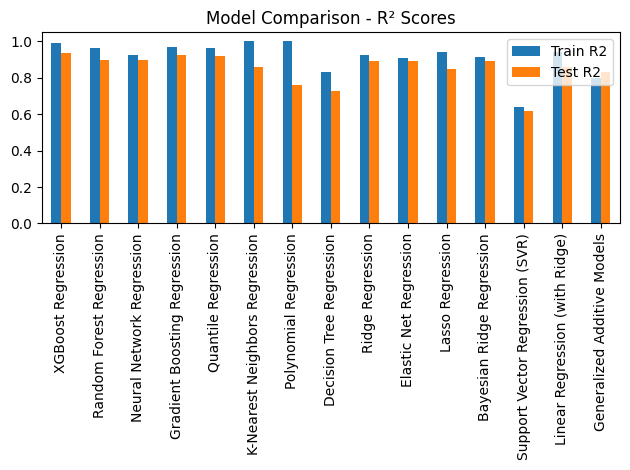

In [ ]:

# Save full results to CSV
results_df.to_csv('model_comparison_results.csv')

# Plot model comparison
plt.figure(figsize=(15, 8))
results_df[['Train R2', 'Test R2']].plot(kind='bar')
plt.title('Model Comparison - R² Scores')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()
plt.close()

In [ ]:
# Load all saved models
loaded_models = {}
for filename in os.listdir('saved_models'):
    if filename.endswith('.joblib') and filename != 'scaler.joblib':
        model_name = filename[:-7].replace("_", " ")
        loaded_models[model_name] = joblib.load(f'saved_models/{filename}')

# Make predictions with all loaded models, ensuring correct input data
predictions = {}
for name, model in loaded_models.items():
    print(f"Making predictions with {name}...")

    if 'polynomial' in name.lower():
        predictions[name] = model.predict(X_test_poly)
    else:
        predictions[name] = model.predict(X_test_scaled)

Making predictions with linear regression (with ridge)...
Making predictions with k-nearest neighbors regression...
Making predictions with ridge regression...
Making predictions with bayesian ridge regression...
Making predictions with neural network regression...
Making predictions with elastic net regression...
Making predictions with quantile regression...
Making predictions with xgboost regression...
Making predictions with support vector regression (svr)...
Making predictions with gradient boosting regression...
Making predictions with polynomial regression...
Making predictions with random forest regression...
Making predictions with decision tree regression...
Making predictions with linear regression...
Making predictions with generalized additive models...
Making predictions with lasso regression...


In [ ]:

# Create a DataFrame to store predictions and actual values
prediction_df = pd.DataFrame({'Actual': y_test})

# Add predictions from each model to the DataFrame
for model_name, y_pred in predictions.items():
    prediction_df[model_name] = y_pred

# Print or display the prediction DataFrame
print("\nPredictions for each model on the test set:")
prediction_df

# Optionally, you can save the predictions to a CSV file
# prediction_df.to_csv('predictions.csv', index=False)


Predictions for each model on the test set:


,Actual,linear regression (with ridge),k-nearest neighbors regression,ridge regression,bayesian ridge regression,neural network regression,elastic net regression,quantile regression,xgboost regression,support vector regression (svr),gradient boosting regression,polynomial regression,random forest regression,decision tree regression,linear regression,generalized additive models,lasso regression
1357,161000,155226.988826,152363.315765,147505.825647,149827.188489,143233.159874,151171.329952,172000.000000,186332.781250,149239.008622,185424.675170,168462.128051,159244.654589,163900.000000,157067.511470,163566.235977,157054.476341
2367,116000,109747.423462,101740.832015,110098.056443,109611.173949,107101.229099,109583.640516,106000.000000,101404.226562,118987.544676,108466.465529,124126.037901,105383.107105,90205.875000,109577.700432,111447.326379,109634.799472
2822,196500,197375.782877,191432.693107,186579.723737,188943.799496,176507.561233,190610.255915,181997.590272,185741.937500,202542.123888,192388.485156,219750.526353,212594.408298,174360.000000,199583.890939,223691.664180,199500.779551
2126,123600,133918.211315,121517.048025,134457.484562,131381.247481,132793.526864,130089.631835,127500.000000,126623.234375,120080.633648,125834.206627,107311.592474,129218.805549,93400.000000,133598.273461,111685.075564,133635.736812
1544,126000,131778.998535,111734.660161,134872.751042,134332.293867,135931.205104,133561.380231,115000.000000,117518.476562,118481.597672,118227.398478,117197.936922,111634.617082,87025.000000,131327.703188,118415.046014,131308.566594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,187500,204552.294406,219671.326399,215019.246507,214616.891407,200654.374159,214305.944529,176000.000000,180061.281250,200909.598346,185095.356494,183939.057031,197555.047479,219580.000000,202265.785437,220364.333780,202235.291977
456,552000,467059.092908,420609.444611,453484.254521,449306.667829,457904.559567,448188.926348,447061.880456,479373.468750,262171.341267,471399.222295,473975.142924,454650.610264,490671.428571,469745.371344,362251.213718,469579.287915
462,173000,191449.655361,189497.874139,195410.060383,195495.357807,192340.783281,195229.570735,179341.024858,179100.421875,192802.141150,183584.496045,205151.250038,197761.136503,203612.142857,190530.239475,198945.726545,190567.383614
2168,118500,123948.295026,144394.307405,119338.163793,118979.688322,124180.857285,118973.462942,127438.116188,133580.203125,139118.498850,134538.945505,172252.211633,140586.939025,162593.333333,124904.732395,144874.245245,124954.126213
